<a href="https://colab.research.google.com/github/SarahEldreny/Deep-Learning-Projects/blob/main/Different_GD_Optimiziers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [2]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [3]:
batch_size=64

num_classes=10

epochs=10

def build_model(optimizer):

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

  return model

In [5]:
optimizers = ['Adadelta', 'Adagrad', 'Adam' , 'SGD']

for i in optimizers:

  model = build_model(i)

  hist=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 63s 66ms/step - loss: 2.2621 - accuracy: 0.1656 - val_loss: 2.1968 - val_accuracy: 0.3805
Epoch 2/10
938/938 [==============================] - 61s 66ms/step - loss: 2.1593 - accuracy: 0.3371 - val_loss: 2.0782 - val_accuracy: 0.6629
Epoch 3/10
938/938 [==============================] - 63s 67ms/step - loss: 2.0444 - accuracy: 0.4818 - val_loss: 1.9433 - val_accuracy: 0.7350
Epoch 4/10
938/938 [==============================] - 59s 63ms/step - loss: 1.9142 - accuracy: 0.5692 - val_loss: 1.7921 - val_accuracy: 0.7658
Epoch 5/10
938/938 [==============================] - 62s 66ms/step - loss: 1.7690 - accuracy: 0.6259 - val_loss: 1.6311 - val_accuracy: 0.7838
Epoch 6/10
938/938 [==============================] - 62s 66ms/step - loss: 1.6223 - accuracy: 0.6615 - val_loss: 1.4693 - val_accuracy: 0.7948
Epoch 7/10
938/938 [==============================] - 62s 66ms/step - loss: 1.4751 - accuracy: 0.6857 - val_loss: 1.3150 - val_accuracy:

We have run our model with a batch size of 64 for 10 epochs. After trying the different optimizers, the results we get are pretty interesting. Before analyzing the results, what do you think will be the best optimizer for this dataset?

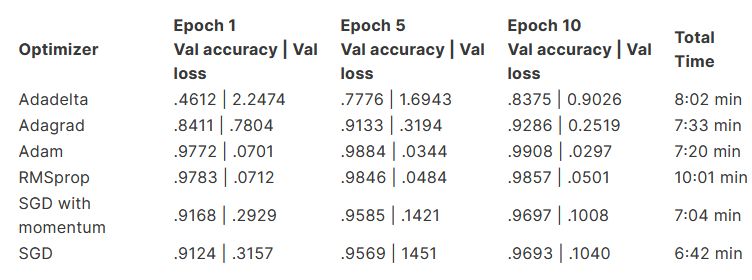

Table Analysis

The above table shows the validation accuracy and loss at different epochs. It also contains the total time that the model took to run on 10 epochs for each optimizer. From the above table, we can make the following analysis.

    The adam optimizer shows the best accuracy in a satisfactory amount of time.
    RMSprop shows similar accuracy to that of Adam but with a comparatively much larger computation time.
    Surprisingly, the SGD algorithm took the least time to train and produced good results as well. But to reach the accuracy of the Adam optimizer, SGD will require more iterations, and hence the computation time will increase.
     SGD with momentum shows similar accuracy to SGD with unexpectedly larger computation time. This means the value of momentum taken needs to be optimized.
    Adadelta shows poor results both with accuracy and computation time.

You can analyze the accuracy of each optimizer with each epoch from the below graph.

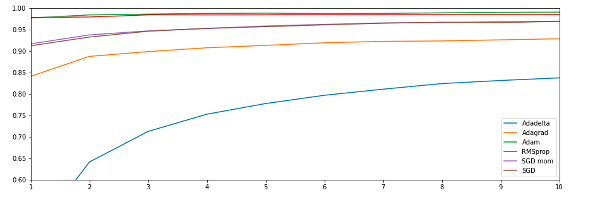


We’ve now reached the end of this comprehensive guide. To refresh your memory, we will go through a summary of every optimization algorithm that we have covered in this guide. To refresh your memory, we will go through a summary of every optimization algorithm that we have covered in this guide.

# Summary

SGD is a very basic algorithm and is hardly used in applications now due to its slow computation speed. One more problem with that algorithm is the constant learning rate for every epoch. Moreover, it is not able to handle saddle points very well. Adagrad works better than stochastic gradient descent generally due to frequent updates in the learning rate. It is best when used for dealing with sparse data. RMSProp shows similar results to that of the gradient descent algorithm with momentum, it just differs in the way by which the gradients are calculated.

Lastly comes the Adam optimizer that inherits the good features of RMSProp and other algorithms. The results of the Adam optimizer are generally better than every other optimization algorithm, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications. Choosing the Adam optimizer for your application might give you the best probability of getting the best results.

But by the end, we learned that even Adam optimizer has some downsides. Also, there are cases when algorithms like SGD might be beneficial and perform better than Adam optimizer. So, it is of utmost importance to know your requirements and the type of data you are dealing with to choose the best optimization algorithm and achieve outstanding results.